In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('vgsales_1.csv',index_col ='Name')


In [42]:
df2 = df.dropna()

In [43]:
df2 = df2.drop('Unnamed: 0',axis = 1)

In [44]:
df2 = df2.drop(['videotitle','published','Release_date','Publisher','Developer','IP'],axis = 1)

In [45]:
df2['multiplayer'] = df2['multiplayer'].replace({True:1,False:0})
df2['singleplayer'] = df2['singleplayer'].replace({True:1,False:0})

In [49]:
sc = preprocessing.StandardScaler()

target = df2['Global_Sales']
data = df2.drop('Global_Sales',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size = 0.2, random_state = 123)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [50]:
X_train

array([[ 0.61924038,  0.1490712 , -0.62950533, ...,  0.56281509,
        -1.62621314,  0.0917502 ],
       [ 0.61924038, -6.70820393,  0.45346524, ...,  0.56281509,
        -1.62621314,  1.14687748],
       [ 0.61924038,  0.1490712 ,  0.88483896, ...,  0.56281509,
        -0.05411217,  0.0917502 ],
       ...,
       [ 0.61924038,  0.1490712 ,  0.26967054, ..., -0.62750648,
         0.73193831,  1.14687748],
       [ 0.61924038,  0.1490712 , -0.70874541, ..., -0.62750648,
         0.73193831,  0.0917502 ],
       [ 0.61924038,  0.1490712 , -0.69154823, ..., -0.62750648,
         0.73193831,  1.14687748]])

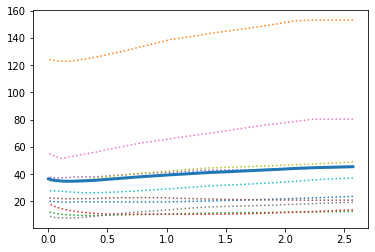

In [52]:
model_lasso = LassoCV(cv=10).fit(X_train,y_train)
alphas = model_lasso.alphas_
plt.plot(alphas, model_lasso.mse_path_,':');
plt.plot(alphas,model_lasso.mse_path_.mean(axis = 1),linewidth = 3)



In [55]:
pred_test = model_lasso.predict(X_test)

print('score test :', model_lasso.score(X_test, y_test))
print('score  train:', model_lasso.score(X_train, y_train))

score test : 0.2347465385121178
score  train: 0.3213016101231203


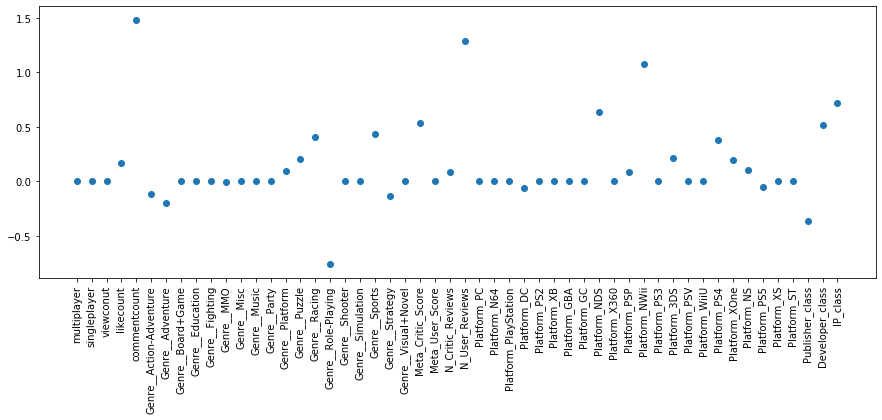

In [80]:
fig = plt.figure(figsize = (15,5))
plt.scatter(range(len(data.columns)),model_lasso.coef_)
plt.xticks(range(len(data.columns)),data.columns,rotation = 90);



In [77]:
for i,j in zip(model_lasso.coef_,data.columns):
    if i>0 :
        print(j)

likecount
commentcount
Genre__Platform
Genre__Puzzle
Genre__Racing
Genre__Sports
Meta_Critic_Score
N_Critic_Reviews
N_User_Reviews
Platform_NDS
Platform_PSP
Platform_NWii
Platform_3DS
Platform_PS4
Platform_XOne
Platform_NS
Developer_class
IP_class


In [78]:
print(model_lasso.alpha_)

0.15783560325836363
